In [1]:
from sklearn import datasets
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

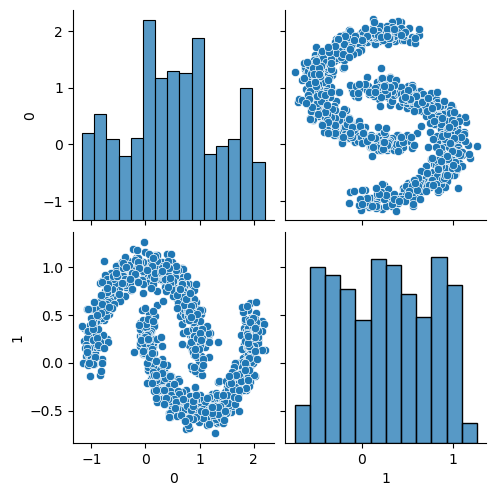

In [2]:
np.random.seed(0)
feature_set_x, labels_y = datasets.make_moons(1000, noise=0.10)
X_train, X_test, y_train, y_test = train_test_split(feature_set_x, labels_y, test_size=0.40, random_state=42)

# num_samples_total = 1000
# training_split = 250

# feature_set_x, labels_y  = datasets.make_moons(n_samples = num_samples_total)
# labels_y[np.where(labels_y == 0)] = -1
# X_train = feature_set_x[training_split:, :]
# X_test = feature_set_x[:training_split, :]
# y_train = labels_y[training_split:]
# y_test = labels_y[:training_split]

df = pd.DataFrame(feature_set_x)
sns.pairplot(df)

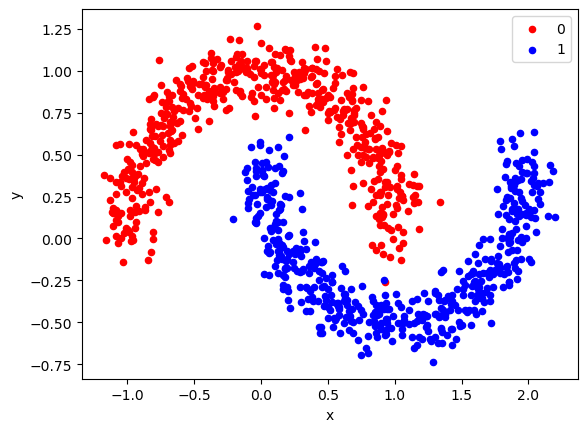

In [3]:
df = pd.DataFrame(dict(x= feature_set_x[:,0], y= feature_set_x[:,1], label =labels_y ))
colors = {0: "red", 1:"blue"}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
   
    group.plot(ax = ax, kind= "scatter", x="x", y="y", label= key, color = colors[key])
plt.show()

In [4]:
#%conda install keras

from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Activation, Reshape

model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))   

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [6]:
results = model.fit(X_train, y_train , epochs=100, batch_size= 30)

Epoch 1/100


2024-04-23 10:08:43.160845: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 1s 6ms/step - loss: 0.7529 - accuracy: 0.4783
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.7036 - accuracy: 0.4650
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.5150
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6324 - accuracy: 0.6433
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.7050
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5754 - accuracy: 0.7317
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7517
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5152 - accuracy: 0.7883
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.8183
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 0.8450
Epoch 11/100
20/20 [=

<Axes: >

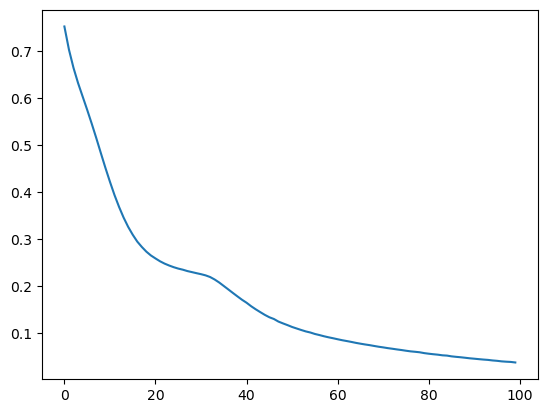

In [7]:
sns.lineplot(x=results.epoch, y=results.history['loss'])

In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.058958400040864944
Test accuracy: 0.9775000214576721


In [10]:
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions


prediction_values = (model.predict(X_test) > 0.5).astype(int)


13/13 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       187
           1       0.97      0.99      0.98       213

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

9600/9600 [==============================] - 16s 2ms/step


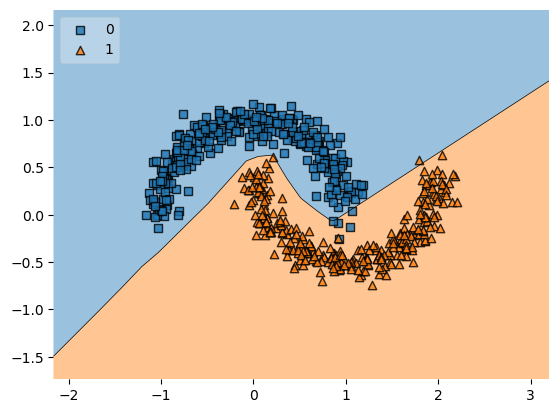

In [11]:
print(metrics.classification_report(y_test, prediction_values))
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.show()

In [12]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, title="Hafl moon neural network")